# Modern Control Systems - Chapter 2 Example 15

## FIGURE 2.53: Transfer Function Operations with G(s) and H(s)

This notebook demonstrates how to work with transfer functions, find poles and zeros, and create pole-zero maps.

We will work with two transfer functions:

**Transfer Function G(s):**
$$G(s) = \frac{6s^2 + 1}{s^3 + 3s^2 + 3s + 1}$$

**Transfer Function H(s):**
$$H(s) = \frac{(s + 1)(s + 2)}{(s + 2j)(s - 2j)(s + 3)}$$

Then compute: $\text{sys}(s) = \frac{G(s)}{H(s)}$

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import control as ct

# Set matplotlib style for better plots
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['grid.alpha'] = 0.3

## Step 1: Define Transfer Function G(s)

Create the transfer function $G(s) = \frac{6s^2 + 1}{s^3 + 3s^2 + 3s + 1}$

In [2]:
# Define numerator and denominator for G(s)
# MATLAB: numg=[6 0 1]; deng=[1 3 3 1]; sysg=tf(numg,deng);
numg = [6, 0, 1]        # 6s² + 0s + 1
deng = [1, 3, 3, 1]     # s³ + 3s² + 3s + 1

sysg = ct.tf(numg, deng)

print("Transfer Function G(s):")
print(sysg)

Transfer Function G(s):
<TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

        6 s^2 + 1
  ---------------------
  s^3 + 3 s^2 + 3 s + 1


## Step 2: Find Zeros of G(s)

The zeros are the roots of the numerator polynomial.

In [3]:
# Find zeros of G(s)
# MATLAB: z=zero(sysg)
z = ct.zeros(sysg)

print("Zeros of G(s):")
for i, zero in enumerate(z, 1):
    if np.isreal(zero):
        print(f"  z{i} = {zero.real:.4f}")
    else:
        print(f"  z{i} = {zero.real:.4f} {zero.imag:+.4f}j")

Zeros of G(s):
  z1 = -0.0000 +0.4082j
  z2 = 0.0000 -0.4082j


## Step 3: Find Poles of G(s)

The poles are the roots of the denominator polynomial.

In [4]:
# Find poles of G(s)
# MATLAB: p=pole(sysg)
p = ct.poles(sysg)

print("Poles of G(s):")
for i, pole in enumerate(p, 1):
    if np.isreal(pole):
        print(f"  p{i} = {pole.real:.4f}")
    else:
        print(f"  p{i} = {pole.real:.4f} {pole.imag:+.4f}j")

Poles of G(s):
  p1 = -1.0000 +0.0000j
  p2 = -1.0000 -0.0000j
  p3 = -1.0000


## Step 4: Define Transfer Function H(s)

Create H(s) by multiplying polynomials:
- Numerator: $(s + 1)(s + 2)$
- Denominator: $(s + 2j)(s - 2j)(s + 3)$

Note: $(s + 2j)(s - 2j) = s^2 + 4$

In [5]:
# Define polynomial factors
# MATLAB: n1=[1 1]; n2=[1 2]; d1=[1 2*i]; d2=[1 -2*i]; d3=[1 3];
n1 = [1, 1]           # (s + 1)
n2 = [1, 2]           # (s + 2)
d1 = [1, 2j]          # (s + 2j)
d2 = [1, -2j]         # (s - 2j)
d3 = [1, 3]           # (s + 3)

# Multiply polynomials using convolution
# MATLAB: numh=conv(n1,n2); denh=conv(d1,conv(d2,d3));
numh = np.convolve(n1, n2)
denh = np.convolve(d3, np.convolve(d1, d2))
denh = np.real_if_close(denh)

sysh = ct.tf(numh, denh)

print("Transfer Function H(s):")
print(sysh)

Transfer Function H(s):
<TransferFunction>: sys[1]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

      s^2 + 3 s + 2
  ----------------------
  s^3 + 3 s^2 + 4 s + 12


## Step 5: Compute sys = G(s) / H(s)

Divide the two transfer functions to get the final system.

In [6]:
# Divide transfer functions: sys = G(s) / H(s)
# MATLAB: sys=sysg/sysh
sys = sysg / sysh

print("System Transfer Function sys(s) = G(s) / H(s):")
print(sys)

System Transfer Function sys(s) = G(s) / H(s):
<TransferFunction>: sys[2]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

  6 s^5 + 18 s^4 + 25 s^3 + 75 s^2 + 4 s + 12
  -------------------------------------------
    s^5 + 6 s^4 + 14 s^3 + 16 s^2 + 9 s + 2


## Step 6: Create Pole-Zero Map

Visualize the poles and zeros of the final system in the complex plane.

array([-2.        +0.j        , -1.00019499+0.00019505j,
       -1.00019499-0.00019505j, -0.99980501+0.00019494j,
       -0.99980501-0.00019494j])

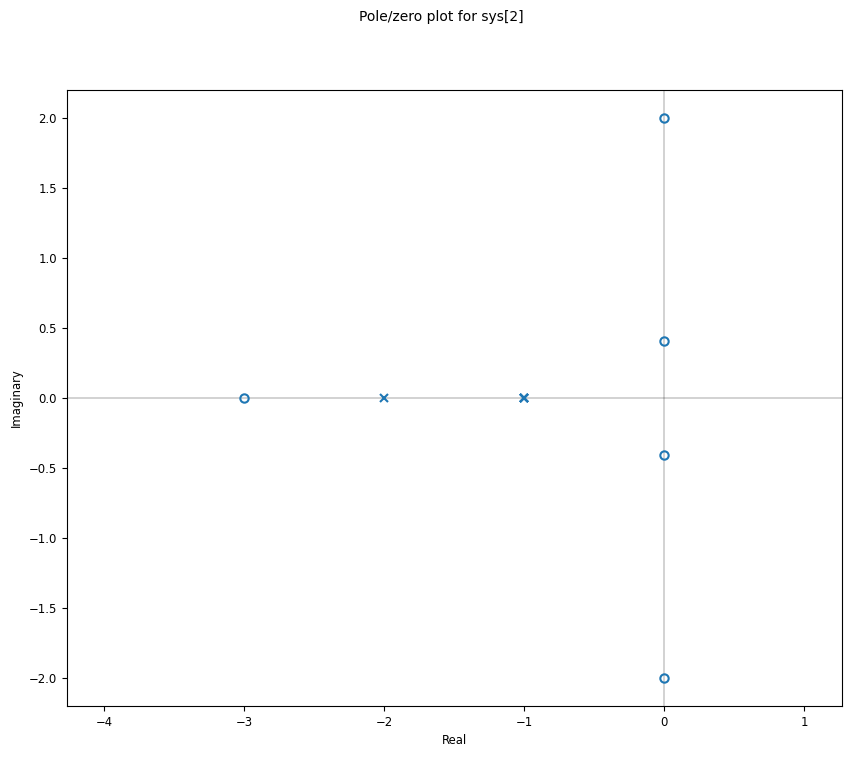

In [23]:
pzmap = ct.pole_zero_map(sys)
pzmap.plot()
pzmap.poles